In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [27]:
def get_unique_values_from_col(df):
    for col in df:
        print(f'{col} : {df[col].unique()}')

In [13]:
get_unique_values_from_col(df)

Geography : ['France' 'Spain' 'Germany']
Gender : ['Female' 'Male']


In [18]:
# df = pd.get_dummies(df, columns=['Geography'])
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,1,True,False,False
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,False,False,True
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,True,False,False
3,699,Female,39,1,0.00,2,0,0,93826.63,0,True,False,False
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Male,39,5,0.00,2,1,0,96270.64,0,True,False,False
9996,516,Male,35,10,57369.61,1,1,1,101699.77,0,True,False,False
9997,709,Female,36,7,0.00,1,0,1,42085.58,1,True,False,False
9998,772,Male,42,3,75075.31,2,1,0,92888.52,1,False,True,False


In [19]:
cols_to_astype = ['Geography_France', 'Geography_Germany', 'Geography_Spain']
df[cols_to_astype] = df[cols_to_astype].astype(int)
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Male,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,Male,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,Female,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,Male,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [20]:
df['Gender'] = df['Gender'].map({'Female': 1, 'Male': 0})
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,0,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,1,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,0,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

cols_to_scale = ['CreditScore','Age','Tenure', 'Balance','NumOfProducts','EstimatedSalary']

df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,1,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0
1,0.516,1,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1
2,0.304,1,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0
3,0.698,1,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0
4,1.000,1,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0,0.283784,0.5,0.000000,0.333333,1,0,0.481341,0,1,0,0
9996,0.332,0,0.229730,1.0,0.228657,0.000000,1,1,0.508490,0,1,0,0
9997,0.718,1,0.243243,0.7,0.000000,0.000000,0,1,0.210390,1,1,0,0
9998,0.844,0,0.324324,0.3,0.299226,0.333333,1,0,0.464429,1,0,1,0


In [22]:
df.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.601058,0.454300,0.282727,0.501280,0.304848,0.176733,0.70550,0.515100,0.500441,0.203700,0.501400,0.250900,0.247700
std,0.193307,0.497932,0.141727,0.289217,0.248696,0.193885,0.45584,0.499797,0.287580,0.402769,0.500023,0.433553,0.431698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.468000,0.000000,0.189189,0.300000,0.000000,0.000000,0.00000,0.000000,0.254977,0.000000,0.000000,0.000000,0.000000
50%,0.604000,0.000000,0.256757,0.500000,0.387402,0.000000,1.00000,1.000000,0.500960,0.000000,1.000000,0.000000,0.000000
75%,0.736000,1.000000,0.351351,0.700000,0.508749,0.333333,1.00000,1.000000,0.746955,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
X = df.drop('Exited', axis=1)
y = df.Exited
X

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,0.538,1,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,0,0
1,0.516,1,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,1
2,0.304,1,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,0,0
3,0.698,1,0.283784,0.1,0.000000,0.333333,0,0,0.469120,1,0,0
4,1.000,1,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0,0.283784,0.5,0.000000,0.333333,1,0,0.481341,1,0,0
9996,0.332,0,0.229730,1.0,0.228657,0.000000,1,1,0.508490,1,0,0
9997,0.718,1,0.243243,0.7,0.000000,0.000000,0,1,0.210390,1,0,0
9998,0.844,0,0.324324,0.3,0.299226,0.333333,1,0,0.464429,0,1,0


In [28]:
get_unique_values_from_col(df)

CreditScore : [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [32]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8000, 12), (8000,), (2000, 12), (2000,))

In [43]:
y_train.value_counts()

Exited
0    6370
1    1630
Name: count, dtype: int64

In [35]:
from tensorflow_addons import losses
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

C:\Users\79173\Desktop\CodeBasics\CodeBas\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [88]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(12, input_dim=12, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(6, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    print(model.get_weights())
    return y_preds

In [39]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5197 - accuracy: 0.7896
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4908 - accuracy: 0.7952
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4796 - accuracy: 0.7962
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4738 - accuracy: 0.7964
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4681 - accuracy: 0.7960
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4615 - accuracy: 0.7966
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4530 - accuracy: 0.7972
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4490 - accuracy: 0.7986
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4436 - accuracy: 0.8011
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4397 - accura

250/250 [==============================] - 0s 1ms/step - loss: 0.3852 - accuracy: 0.8328
Epoch 82/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3853 - accuracy: 0.8331
Epoch 83/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3845 - accuracy: 0.8386
Epoch 84/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3861 - accuracy: 0.8359
Epoch 85/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3822 - accuracy: 0.8354
Epoch 86/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3834 - accuracy: 0.8374
Epoch 87/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3836 - accuracy: 0.8317
Epoch 88/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3797 - accuracy: 0.8382
Epoch 89/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3891 - accuracy: 0.8330
Epoch 90/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3824 - accuracy: 

Text(95.72222222222221, 0.5, 'Truth')

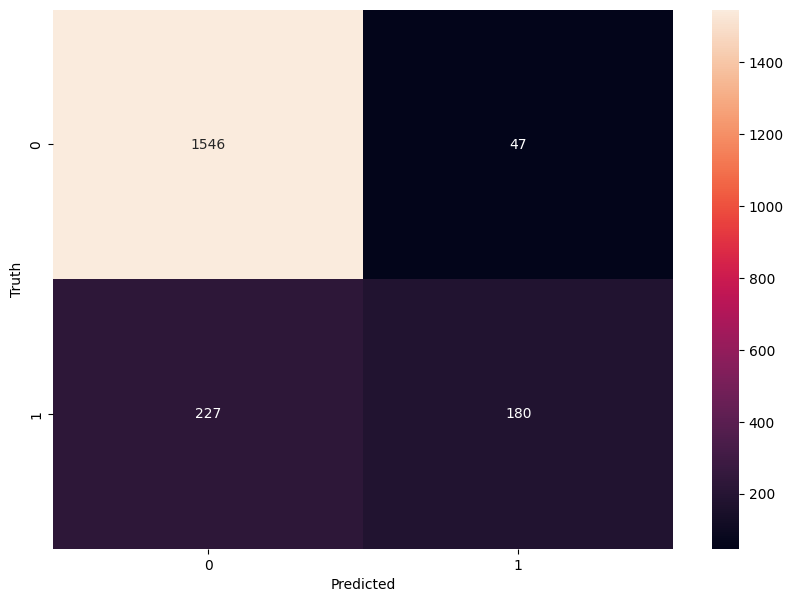

In [40]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_preds)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [44]:
# class count
count_class_0, count_class_1 = df.Exited.value_counts()

# divide by class
df_class_0 = df[df.Exited == 0]
df_class_1 = df[df.Exited == 1]

In [45]:
df_class_0.shape, df_class_1.shape

((7963, 13), (2037, 13))

In [47]:
df_class_0.sample(2)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
1867,0.73,1,0.202703,0.3,0.339691,0.0,1,1,0.34041,0,1,0,0
1662,0.69,0,0.297297,0.7,0.554098,0.0,0,1,0.96695,0,0,1,0


In [52]:
df_class_0_under = df_class_0.sample(df_class_1.shape[0], replace=True)
df_class_0_under

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
7538,0.502,0,0.135135,0.6,0.000000,0.333333,1,0,0.073275,0,0,0,1
2534,0.734,1,0.229730,0.5,0.411381,0.000000,1,0,0.860888,0,0,1,0
153,0.378,0,0.256757,0.2,0.508611,0.000000,1,0,0.493220,0,1,0,0
7597,0.772,0,0.148649,0.4,0.000000,0.333333,0,0,0.258492,0,1,0,0
5001,0.808,0,0.229730,0.4,0.000000,0.333333,1,1,0.048239,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,0.956,1,0.310811,0.7,0.000000,0.333333,1,0,0.856918,0,1,0,0
4416,0.242,0,0.324324,0.3,0.657444,0.000000,1,0,0.952692,0,1,0,0
7359,0.632,0,0.243243,0.4,0.478941,0.333333,1,0,0.168466,0,1,0,0
4813,0.334,0,0.283784,0.3,0.000000,0.333333,0,1,0.062276,0,0,0,1


In [54]:
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

In [55]:
df_test_under

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
7538,0.502,0,0.135135,0.6,0.000000,0.333333,1,0,0.073275,0,0,0,1
2534,0.734,1,0.229730,0.5,0.411381,0.000000,1,0,0.860888,0,0,1,0
153,0.378,0,0.256757,0.2,0.508611,0.000000,1,0,0.493220,0,1,0,0
7597,0.772,0,0.148649,0.4,0.000000,0.333333,0,0,0.258492,0,1,0,0
5001,0.808,0,0.229730,0.4,0.000000,0.333333,1,1,0.048239,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,0.296,0,0.324324,0.3,0.605982,0.000000,1,1,0.267193,1,0,1,0
9982,0.610,1,0.378378,0.7,0.546617,0.000000,1,0,0.575729,1,0,1,0
9991,0.494,1,0.472973,0.4,0.352259,0.000000,1,0,0.346899,1,1,0,0
9997,0.718,1,0.243243,0.7,0.000000,0.000000,0,1,0.210390,1,1,0,0


In [57]:
print('Random under-sampling:')
print(df_test_under.Exited.value_counts())

Random under-sampling:
Exited
0    2037
1    2037
Name: count, dtype: int64


In [60]:
X = df_test_under.drop('Exited',axis='columns')
y = df_test_under['Exited']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [62]:
y_train.value_counts()

Exited
1    1630
0    1629
Name: count, dtype: int64

In [63]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
102/102 [==============================] - 1s 2ms/step - loss: 0.7031 - accuracy: 0.5532
Epoch 2/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6799 - accuracy: 0.5640
Epoch 3/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6715 - accuracy: 0.5910
Epoch 4/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6661 - accuracy: 0.5937
Epoch 5/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6564 - accuracy: 0.6103
Epoch 6/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6541 - accuracy: 0.6214
Epoch 7/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6540 - accuracy: 0.6220
Epoch 8/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6455 - accuracy: 0.6312
Epoch 9/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6428 - accuracy: 0.6250
Epoch 10/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6401 - accura

102/102 [==============================] - 0s 1ms/step - loss: 0.5077 - accuracy: 0.7548
Epoch 82/100
102/102 [==============================] - 0s 1ms/step - loss: 0.5039 - accuracy: 0.7634
Epoch 83/100
102/102 [==============================] - 0s 1ms/step - loss: 0.5098 - accuracy: 0.7610
Epoch 84/100
102/102 [==============================] - 0s 1ms/step - loss: 0.5141 - accuracy: 0.7533
Epoch 85/100
102/102 [==============================] - 0s 1ms/step - loss: 0.5048 - accuracy: 0.7637
Epoch 86/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5119 - accuracy: 0.7533
Epoch 87/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5023 - accuracy: 0.7656
Epoch 88/100
102/102 [==============================] - 0s 1ms/step - loss: 0.4944 - accuracy: 0.7671
Epoch 89/100
102/102 [==============================] - 0s 1ms/step - loss: 0.5006 - accuracy: 0.7619
Epoch 90/100
102/102 [==============================] - 0s 1ms/step - loss: 0.5037 - accuracy: 

In [64]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Exited.value_counts())

Random over-sampling:
Exited
0    7963
1    7963
Name: count, dtype: int64


In [71]:
X = df_test_over.drop('Exited',axis='columns')
y = df_test_over['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [73]:
y_train.value_counts()

Exited
0    6370
1    6370
Name: count, dtype: int64

In [74]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
399/399 [==============================] - 1s 2ms/step - loss: 0.6883 - accuracy: 0.5457
Epoch 2/100
399/399 [==============================] - 1s 2ms/step - loss: 0.6498 - accuracy: 0.6305
Epoch 3/100
399/399 [==============================] - 1s 1ms/step - loss: 0.6286 - accuracy: 0.6601
Epoch 4/100
399/399 [==============================] - 1s 1ms/step - loss: 0.6114 - accuracy: 0.6792
Epoch 5/100
399/399 [==============================] - 1s 2ms/step - loss: 0.5881 - accuracy: 0.6969
Epoch 6/100
399/399 [==============================] - 1s 1ms/step - loss: 0.5695 - accuracy: 0.7148
Epoch 7/100
399/399 [==============================] - 1s 1ms/step - loss: 0.5622 - accuracy: 0.7183
Epoch 8/100
399/399 [==============================] - 1s 2ms/step - loss: 0.5480 - accuracy: 0.7309
Epoch 9/100
399/399 [==============================] - 1s 2ms/step - loss: 0.5425 - accuracy: 0.7355
Epoch 10/100
399/399 [==============================] - 1s 2ms/step - loss: 0.5390 - accura

399/399 [==============================] - 1s 2ms/step - loss: 0.4858 - accuracy: 0.7664
Epoch 82/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4846 - accuracy: 0.7687
Epoch 83/100
399/399 [==============================] - 1s 1ms/step - loss: 0.4863 - accuracy: 0.7637
Epoch 84/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4884 - accuracy: 0.7657
Epoch 85/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4892 - accuracy: 0.7655
Epoch 86/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4812 - accuracy: 0.7653
Epoch 87/100
399/399 [==============================] - 1s 1ms/step - loss: 0.4861 - accuracy: 0.7677
Epoch 88/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4904 - accuracy: 0.7662
Epoch 89/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4879 - accuracy: 0.7697
Epoch 90/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4851 - accuracy: 

In [77]:
X = df.drop('Exited',axis='columns')
y = df['Exited']

In [78]:
X.shape, y.shape

((10000, 12), (10000,))

In [82]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [85]:
# Number of classes in training Data
y_test.value_counts()

Exited
0    1593
1    1593
Name: count, dtype: int64

In [86]:
y_train.value_counts()

Exited
0    6370
1    6370
Name: count, dtype: int64

In [89]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
399/399 [==============================] - 2s 2ms/step - loss: 0.6895 - accuracy: 0.5582
Epoch 2/100
399/399 [==============================] - 1s 2ms/step - loss: 0.6559 - accuracy: 0.6265
Epoch 3/100
399/399 [==============================] - 1s 2ms/step - loss: 0.6247 - accuracy: 0.6677
Epoch 4/100
399/399 [==============================] - 1s 2ms/step - loss: 0.5954 - accuracy: 0.6958
Epoch 5/100
399/399 [==============================] - 1s 2ms/step - loss: 0.5794 - accuracy: 0.7040
Epoch 6/100
399/399 [==============================] - 1s 2ms/step - loss: 0.5660 - accuracy: 0.7159
Epoch 7/100
399/399 [==============================] - 1s 2ms/step - loss: 0.5545 - accuracy: 0.7186
Epoch 8/100
399/399 [==============================] - 1s 1ms/step - loss: 0.5463 - accuracy: 0.7275
Epoch 9/100
399/399 [==============================] - 1s 1ms/step - loss: 0.5421 - accuracy: 0.7314
Epoch 10/100
399/399 [==============================] - 1s 2ms/step - loss: 0.5323 - accura

399/399 [==============================] - 1s 1ms/step - loss: 0.4894 - accuracy: 0.7655
Epoch 82/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4920 - accuracy: 0.7622
Epoch 83/100
399/399 [==============================] - 1s 1ms/step - loss: 0.4940 - accuracy: 0.7593
Epoch 84/100
399/399 [==============================] - 1s 1ms/step - loss: 0.4892 - accuracy: 0.7610
Epoch 85/100
399/399 [==============================] - 1s 1ms/step - loss: 0.4962 - accuracy: 0.7542
Epoch 86/100
399/399 [==============================] - 1s 1ms/step - loss: 0.4900 - accuracy: 0.7663
Epoch 87/100
399/399 [==============================] - 1s 1ms/step - loss: 0.4912 - accuracy: 0.7609
Epoch 88/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4922 - accuracy: 0.7652
Epoch 89/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4921 - accuracy: 0.7608
Epoch 90/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4904 - accuracy: 

In [93]:
df.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [94]:
# Regain Original features and labels
X = df.drop('Exited',axis='columns')
y = df['Exited']

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [96]:
y_train.value_counts()

Exited
0    6370
1    1630
Name: count, dtype: int64

In [99]:
df3 = X_train.copy()
df3['Exited'] = y_train

In [100]:
df3.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Exited
5710,0.856,0,0.216216,0.5,0.554265,0.333333,0,0,0.339721,1,0,0,0
3745,0.852,1,0.256757,0.1,0.371163,0.333333,1,1,0.980432,0,1,0,0
5429,0.664,1,0.405405,0.7,0.000000,0.333333,1,0,0.325318,1,0,0,0
551,0.648,0,0.391892,0.6,0.426077,0.000000,1,1,0.010339,0,1,0,1
8967,0.970,0,0.094595,0.7,0.000000,0.333333,1,1,0.417230,1,0,0,0


In [102]:
df3_class0 = df3[df3.Exited==0]
df3_class1 = df3[df3.Exited==1]

In [103]:
df3_class0.shape, df3_class1.shape

((6370, 13), (1630, 13))

In [104]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Exited', axis='columns')
    y_train = df_train.Exited
    return X_train, y_train 

In [116]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1630)

y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
102/102 [==============================] - 1s 2ms/step - loss: 0.7025 - accuracy: 0.4706
Epoch 2/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6862 - accuracy: 0.5316
Epoch 3/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6707 - accuracy: 0.5936
Epoch 4/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6598 - accuracy: 0.6077
Epoch 5/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6535 - accuracy: 0.6138
Epoch 6/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6479 - accuracy: 0.6298
Epoch 7/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6423 - accuracy: 0.6423
Epoch 8/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6371 - accuracy: 0.6515
Epoch 9/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6336 - accuracy: 0.6518
Epoch 10/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6313 - accura

102/102 [==============================] - 0s 2ms/step - loss: 0.5267 - accuracy: 0.7377
Epoch 82/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5237 - accuracy: 0.7472
Epoch 83/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5209 - accuracy: 0.7475
Epoch 84/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5255 - accuracy: 0.7479
Epoch 85/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5199 - accuracy: 0.7463
Epoch 86/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5260 - accuracy: 0.7488
Epoch 87/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5290 - accuracy: 0.7512
Epoch 88/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5180 - accuracy: 0.7433
Epoch 89/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5234 - accuracy: 0.7445
Epoch 90/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5295 - accuracy: 

In [118]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1630, 3260)

y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
102/102 [==============================] - 1s 2ms/step - loss: 0.6889 - accuracy: 0.5500
Epoch 2/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6772 - accuracy: 0.5939
Epoch 3/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6683 - accuracy: 0.6080
Epoch 4/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6627 - accuracy: 0.6276
Epoch 5/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6534 - accuracy: 0.6405
Epoch 6/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6512 - accuracy: 0.6485
Epoch 7/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6443 - accuracy: 0.6482
Epoch 8/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6437 - accuracy: 0.6515
Epoch 9/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6390 - accuracy: 0.6537
Epoch 10/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6356 - accura

102/102 [==============================] - 0s 2ms/step - loss: 0.5126 - accuracy: 0.7574
Epoch 82/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5160 - accuracy: 0.7515
Epoch 83/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5232 - accuracy: 0.7420
Epoch 84/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5168 - accuracy: 0.7491
Epoch 85/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5056 - accuracy: 0.7534
Epoch 86/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5189 - accuracy: 0.7500
Epoch 87/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5169 - accuracy: 0.7497
Epoch 88/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5139 - accuracy: 0.7500
Epoch 89/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5141 - accuracy: 0.7506
Epoch 90/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5160 - accuracy: 

In [120]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 3260, 4890)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
102/102 [==============================] - 1s 2ms/step - loss: 0.6854 - accuracy: 0.5561
Epoch 2/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6780 - accuracy: 0.5850
Epoch 3/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6619 - accuracy: 0.6101
Epoch 4/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6499 - accuracy: 0.6202
Epoch 5/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6447 - accuracy: 0.6233
Epoch 6/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6458 - accuracy: 0.6313
Epoch 7/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6354 - accuracy: 0.6472
Epoch 8/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6346 - accuracy: 0.6482
Epoch 9/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6311 - accuracy: 0.6485
Epoch 10/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6290 - accura

102/102 [==============================] - 0s 2ms/step - loss: 0.5140 - accuracy: 0.7546
Epoch 82/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5031 - accuracy: 0.7604
Epoch 83/100
102/102 [==============================] - 0s 2ms/step - loss: 0.4985 - accuracy: 0.7666
Epoch 84/100
102/102 [==============================] - 0s 2ms/step - loss: 0.4997 - accuracy: 0.7552
Epoch 85/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5063 - accuracy: 0.7583
Epoch 86/100
102/102 [==============================] - 0s 2ms/step - loss: 0.4962 - accuracy: 0.7650
Epoch 87/100
102/102 [==============================] - 0s 2ms/step - loss: 0.4977 - accuracy: 0.7638
Epoch 88/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5004 - accuracy: 0.7623
Epoch 89/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5021 - accuracy: 0.7644
Epoch 90/100
102/102 [==============================] - 0s 2ms/step - loss: 0.4966 - accuracy: 

In [121]:
len(y_pred1), len(y_pred2), len(y_pred3) 

(2000, 2000, 2000)

In [122]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [123]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.93      0.78      0.85      1593
           1       0.47      0.76      0.58       407

    accuracy                           0.78      2000
   macro avg       0.70      0.77      0.71      2000
weighted avg       0.83      0.78      0.79      2000

